In [2]:
import numpy as np
from skimage.color import rgb2hed
from PIL import Image
import numpy as np
from tabulate import tabulate
import os



In [30]:
rgbimg = np.array(Image.open("PDL1_SP142_4/TNBC_Block_4_block_1_314921_3_I_PD-L1_SP142.png"))
print(rgbimg.shape)
print(rgbimg.ndim)


(3770, 3770, 3)
3


In [31]:
hedimg = skimage.color.rgb2hed(rgbimg)




In [4]:
#rgbimg
import skimage
print(skimage.__version__)

0.16.2


In [36]:
print(type(hedimg))
print(hedimg.shape)
print(hedimg.ndim)
#hedimg

<class 'numpy.ndarray'>
(3770, 3770, 3)
3


In [38]:
newimage = skimage.color.hed2rgb(hedimg)
#image = Image.fromarray(newimage)
#image.save('test_hed_img.jpg')
newimage == rgbimg

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

In [5]:
image = Image.fromarray(hedimg.astype('uint8')).convert('RGB')
image.save('test_hed_img.jpg')

NameError: name 'hedimg' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


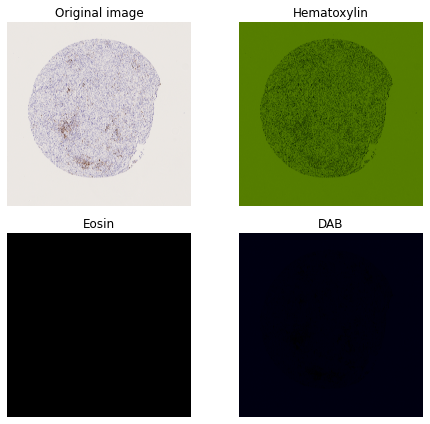

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

# Example IHC image
ihc_rgb = rgbimg

# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()